In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data=pd.read_csv('Titanic.csv')

In [3]:
data.head()

,sex,age,sibsp,parch,fare,embarked,class,who,alone,survived
0,male,22.0,1,0,7.2500,S,Third,man,False,0
1,female,38.0,1,0,71.2833,C,First,woman,False,1
2,female,26.0,0,0,7.9250,S,Third,woman,True,1
3,female,35.0,1,0,53.1000,S,First,woman,False,1
4,male,35.0,0,0,8.0500,S,Third,man,True,0


In [4]:
data.tail()

,sex,age,sibsp,parch,fare,embarked,class,who,alone,survived
886,male,27.0,0,0,13.00,S,Second,man,True,0
887,female,19.0,0,0,30.00,S,First,woman,True,1
888,female,NaN,1,2,23.45,S,Third,woman,False,0
889,male,26.0,0,0,30.00,C,First,man,True,1
890,male,32.0,0,0,7.75,Q,Third,man,True,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sex       891 non-null    object 
 1   age       714 non-null    float64
 2   sibsp     891 non-null    int64  
 3   parch     891 non-null    int64  
 4   fare      891 non-null    float64
 5   embarked  889 non-null    object 
 6   class     891 non-null    object 
 7   who       891 non-null    object 
 8   alone     891 non-null    bool   
 9   survived  891 non-null    int64  
dtypes: bool(1), float64(2), int64(3), object(4)
memory usage: 63.6+ KB


In [6]:
data.shape

(891, 10)

In [7]:
data.describe()

,age,sibsp,parch,fare,survived
count,714.000000,891.000000,891.000000,891.000000,891.000000
mean,29.699118,0.523008,0.381594,32.204208,0.383838
std,14.526497,1.102743,0.806057,49.693429,0.486592
min,0.420000,0.000000,0.000000,0.000000,0.000000
25%,20.125000,0.000000,0.000000,7.910400,0.000000
50%,28.000000,0.000000,0.000000,14.454200,0.000000
75%,38.000000,1.000000,0.000000,31.000000,1.000000
max,80.000000,8.000000,6.000000,512.329200,1.000000


In [8]:
data.isnull().sum()

sex           0
age         177
sibsp         0
parch         0
fare          0
embarked      2
class         0
who           0
alone         0
survived      0
dtype: int64

In [9]:
data.dropna(inplace = True)

In [10]:
data.isnull().sum()

sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
class       0
who         0
alone       0
survived    0
dtype: int64

In [11]:
data.duplicated().sum()

38

In [12]:
data.drop_duplicates(inplace = True)

In [13]:
data.corr()

C:\Users\HP\AppData\Local\Temp\ipykernel_11344\2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,age,sibsp,parch,fare,alone,survived
age,1.000000,-0.313267,-0.192500,0.090985,0.204880,-0.090309
sibsp,-0.313267,1.000000,0.374674,0.131512,-0.620551,-0.034734
parch,-0.192500,0.374674,1.000000,0.198677,-0.571863,0.082956
fare,0.090985,0.131512,0.198677,1.000000,-0.253008,0.257691
alone,0.204880,-0.620551,-0.571863,-0.253008,1.000000,-0.181316
survived,-0.090309,-0.034734,0.082956,0.257691,-0.181316,1.000000


C:\Users\HP\AppData\Local\Temp\ipykernel_11344\1794321463.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr())


<AxesSubplot: >

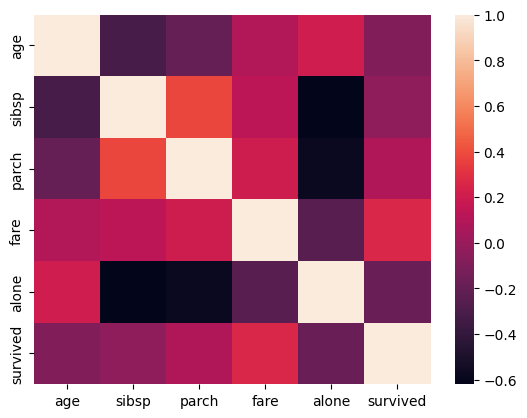

In [14]:
sns.heatmap(data.corr())

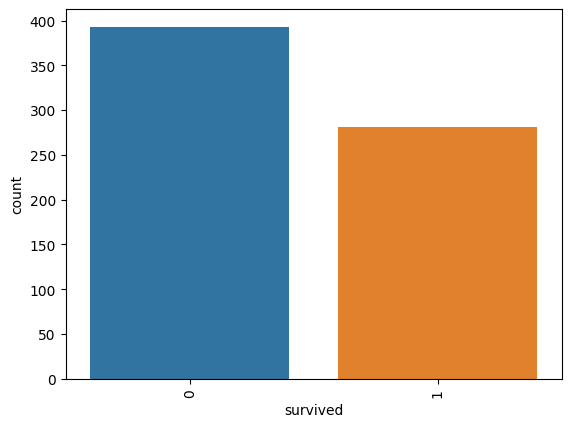

In [15]:
sns.countplot(x='survived', data=data)  # Visualize counts of categorical features
plt.xticks(rotation=90)
plt.show()

In [16]:
print(data)

        sex   age  sibsp  parch     fare embarked   class    who  alone  \
0      male  22.0      1      0   7.2500        S   Third    man  False   
1    female  38.0      1      0  71.2833        C   First  woman  False   
2    female  26.0      0      0   7.9250        S   Third  woman   True   
3    female  35.0      1      0  53.1000        S   First  woman  False   
4      male  35.0      0      0   8.0500        S   Third    man   True   
..      ...   ...    ...    ...      ...      ...     ...    ...    ...   
883    male  28.0      0      0  10.5000        S  Second    man   True   
885  female  39.0      0      5  29.1250        Q   Third  woman  False   
887  female  19.0      0      0  30.0000        S   First  woman   True   
889    male  26.0      0      0  30.0000        C   First    man   True   
890    male  32.0      0      0   7.7500        Q   Third    man   True   

     survived  
0           0  
1           1  
2           1  
3           1  
4           0  
.. 

In [17]:
# Mapping categorical variables to numerical values
d1 = {'male': 0, 'female': 1}
data['sex'] = data['sex'].map(d1)
d2 = {'man': 0, 'woman': 1, 'child': 2}
data['who'] = data['who'].map(d2)

print(data)

     sex   age  sibsp  parch     fare embarked   class  who  alone  survived
0      0  22.0      1      0   7.2500        S   Third    0  False         0
1      1  38.0      1      0  71.2833        C   First    1  False         1
2      1  26.0      0      0   7.9250        S   Third    1   True         1
3      1  35.0      1      0  53.1000        S   First    1  False         1
4      0  35.0      0      0   8.0500        S   Third    0   True         0
..   ...   ...    ...    ...      ...      ...     ...  ...    ...       ...
883    0  28.0      0      0  10.5000        S  Second    0   True         0
885    1  39.0      0      5  29.1250        Q   Third    1  False         0
887    1  19.0      0      0  30.0000        S   First    1   True         1
889    0  26.0      0      0  30.0000        C   First    0   True         1
890    0  32.0      0      0   7.7500        Q   Third    0   True         0

[674 rows x 10 columns]


In [18]:
features = ['who', 'sex', 'age', 'fare']

X= data[features]
y = data['survived']

print(X)
print(y)

     who  sex   age     fare
0      0    0  22.0   7.2500
1      1    1  38.0  71.2833
2      1    1  26.0   7.9250
3      1    1  35.0  53.1000
4      0    0  35.0   8.0500
..   ...  ...   ...      ...
883    0    0  28.0  10.5000
885    1    1  39.0  29.1250
887    1    1  19.0  30.0000
889    0    0  26.0  30.0000
890    0    0  32.0   7.7500

[674 rows x 4 columns]
0      0
1      1
2      1
3      1
4      0
      ..
883    0
885    0
887    1
889    1
890    0
Name: survived, Length: 674, dtype: int64


In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [27]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [28]:
# Initialize the decision tree classifier
dtree = DecisionTreeClassifier()

In [29]:
# Train the classifier on the training data
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [30]:
# Make predictions on the test data
y_pred = dtree.predict(X_test)

In [31]:
from sklearn.metrics import accuracy_score, classification_report

In [32]:
# Calculate accuracy
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

Accuracy: 0.7309417040358744


In [33]:
# Generate classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.81      0.77       127
           1       0.71      0.62      0.67        96

    accuracy                           0.73       223
   macro avg       0.73      0.72      0.72       223
weighted avg       0.73      0.73      0.73       223

